In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

%store -r analysis_df
%store -r df

ML_df = analysis_df.copy()

In [2]:
ML_df.columns = ML_df.columns.str.lower()
dummy_cols = ['gender','monthlyincome','department','workingfromhome','businesstravel','complaintfiled',
             'jobsatisfaction', 'performancerating']

ML_df_reduced = ML_df[dummy_cols]
ML_df_reduced.department = ML_df_reduced.department.map({'Research & Development':'RD','Human Resources': 'HR','Sales':'Sales'})
ML_df_reduced.workingfromhome = ML_df_reduced.workingfromhome.map({0:'n',1:'y'})
ML_df_reduced.complaintfiled = ML_df_reduced.complaintfiled.map({0:'n',1:'y'})
ML_df_reduced['id'] = np.arange(1,len(df)+1)
ML_df_reduced['left'] = ML_df['left']

for col in dummy_cols:
    ML_df_reduced = pd.get_dummies(ML_df_reduced, columns=[col], prefix=[col])

print(ML_df_reduced.columns)
print(ML_df_reduced.shape)

Index(['id', 'left', 'gender_Female', 'gender_Male', 'monthlyincome_high',
       'monthlyincome_low', 'monthlyincome_medium', 'department_HR',
       'department_RD', 'department_Sales', 'workingfromhome_n',
       'workingfromhome_y', 'businesstravel_Non-Travel',
       'businesstravel_Travel_Frequently', 'businesstravel_Travel_Rarely',
       'complaintfiled_n', 'complaintfiled_y', 'jobsatisfaction_1',
       'jobsatisfaction_2', 'jobsatisfaction_3', 'jobsatisfaction_4',
       'performancerating_1', 'performancerating_2', 'performancerating_3',
       'performancerating_4', 'performancerating_5'],
      dtype='object')
(1474, 26)


C:\Users\zains\AppData\Local\Temp\ipykernel_20588\1858121213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML_df_reduced.department = ML_df_reduced.department.map({'Research & Development':'RD','Human Resources': 'HR','Sales':'Sales'})
C:\Users\zains\AppData\Local\Temp\ipykernel_20588\1858121213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML_df_reduced.workingfromhome = ML_df_reduced.workingfromhome.map({0:'n',1:'y'})
C:\Users\zains\AppData\Local\Temp\ipykernel_20588\1858121213.py:8: SettingWi

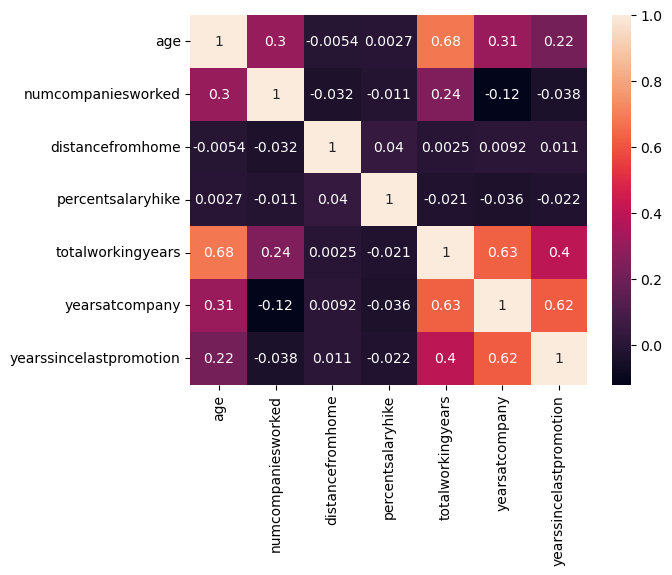

   ageGroup_18-24  ageGroup_25-35  ageGroup_36-49  ageGroup_50-60  \
0               0               1               0               0   
1               0               1               0               0   
2               0               1               0               0   
3               0               0               1               0   
4               0               1               0               0   

   distanceGroup_close  distanceGroup_far  distanceGroup_medium  \
0                    1                  0                     0   
1                    1                  0                     0   
2                    0                  0                     1   
3                    1                  0                     0   
4                    0                  1                     0   

   salaryhikeGroup_large  salaryhikeGroup_small  totworkyrsGroup_entry  \
0                      0                      1                      1   
1                      0          

C:\Users\zains\AppData\Local\Temp\ipykernel_20588\3169400128.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML_df_reduced2['ageGroup'] = ML_df.age.apply(lambda x: '18-24' if x < 25 else (
C:\Users\zains\AppData\Local\Temp\ipykernel_20588\3169400128.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML_df_reduced2['distanceGroup'] = ML_df.distancefromhome.apply(lambda x: 'close' if x <= 5 else (
C:\Users\zains\AppData\Local\Temp\ipykernel_20588\3169400128.py:14: SettingWithCopyWarning: 
A value is try

In [3]:
other_cols = ['age','numcompaniesworked','distancefromhome','percentsalaryhike',
             'totalworkingyears','yearsatcompany','yearssincelastpromotion']

ML_df_reduced2 = ML_df[other_cols]

sns.heatmap(ML_df_reduced2.corr(),annot=True)
plt.show()

ML_df_reduced2['ageGroup'] = ML_df.age.apply(lambda x: '18-24' if x < 25 else (
'25-35' if (x >= 25) & (x <= 35) else (
'36-49' if (x > 35) & (x < 50) else '50-60')))
ML_df_reduced2['distanceGroup'] = ML_df.distancefromhome.apply(lambda x: 'close' if x <= 5 else (
'medium' if (x > 5) & (x <= 10) else 'far'))
ML_df_reduced2['salaryhikeGroup'] = ML_df.percentsalaryhike.apply(lambda x: 'small' if x <= 15 else 'large')
ML_df_reduced2['totworkyrsGroup'] = ML_df.totalworkingyears.apply(lambda x: 'entry' if x<=1 else (
'junior' if (x >=2) & (x <=4) else ('senior' if (x>=5) & (x<=10) else 'leader')))
ML_df_reduced2['yrsatcompGroup'] = ML_df.yearsatcompany.apply(lambda x: 'fresh' if x<=2 else(
'medium' if (x>=3) & (x<=6) else 'long'))
ML_df_reduced2['yrspromotionGroup'] = ML_df.yearssincelastpromotion.apply(lambda x: 'recent' if x<=2 else 'longtime')

ML_df_reduced2 = ML_df_reduced2.drop(columns = other_cols)
dummy_cols2 = ['ageGroup','distanceGroup','salaryhikeGroup','totworkyrsGroup',
                'yrsatcompGroup','yrspromotionGroup']

for col in dummy_cols2:
    ML_df_reduced2 = pd.get_dummies(ML_df_reduced2, columns=[col], prefix=[col])
    
ML_df_reduced2['id'] = np.arange(1,len(df)+1)

print(ML_df_reduced2.head())
print(ML_df_reduced2.shape)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ML_df_reduced2_scaled = scaler.fit_transform(ML_df_reduced2)
ML_df_reduced2_scaled = pd.DataFrame(ML_df_reduced2_scaled, columns = ML_df_reduced2.columns.to_list())

ML_df_reduced2_scaled['id'] = np.arange(1,len(df)+1)
print(ML_df_reduced2_scaled.columns)

Index(['ageGroup_18-24', 'ageGroup_25-35', 'ageGroup_36-49', 'ageGroup_50-60',
       'distanceGroup_close', 'distanceGroup_far', 'distanceGroup_medium',
       'salaryhikeGroup_large', 'salaryhikeGroup_small',
       'totworkyrsGroup_entry', 'totworkyrsGroup_junior',
       'totworkyrsGroup_leader', 'totworkyrsGroup_senior',
       'yrsatcompGroup_fresh', 'yrsatcompGroup_long', 'yrsatcompGroup_medium',
       'yrspromotionGroup_longtime', 'yrspromotionGroup_recent', 'id'],
      dtype='object')


In [5]:
ML_DF = pd.merge(ML_df_reduced,ML_df_reduced2_scaled,how='outer')
ML_DF = ML_DF.drop(columns='id')
print(ML_DF.head())
print(ML_DF.shape)

  left  gender_Female  gender_Male  monthlyincome_high  monthlyincome_low  \
0   No              1            0                   0                  1   
1   No              0            1                   0                  1   
2   No              1            0                   0                  0   
3   No              0            1                   1                  0   
4   No              0            1                   0                  0   

   monthlyincome_medium  department_HR  department_RD  department_Sales  \
0                     0              0              1                 0   
1                     0              0              1                 0   
2                     1              0              1                 0   
3                     0              0              1                 0   
4                     1              0              1                 0   

   workingfromhome_n  ...  salaryhikeGroup_small  totworkyrsGroup_entry  \
0          

In [6]:
X = ML_DF.drop(columns=['left'])
y = ML_DF.loc[:,['left']]

from sklearn.model_selection import train_test_split
test_size = .25

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=1)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tabulate import tabulate

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.6639566395663956
['No' 'Yes']
Feature                             Coefficient
--------------------------------  -------------
gender_Female                        -0.14236
gender_Male                           0.142683
monthlyincome_high                   -0.222522
monthlyincome_low                     0.606641
monthlyincome_medium                 -0.383795
department_HR                         0.0479264
department_RD                        -0.39616
department_Sales                      0.348557
workingfromhome_n                    -0.0605449
workingfromhome_y                     0.060868
businesstravel_Non-Travel            -0.579492
businesstravel_Travel_Frequently      0.614149
businesstravel_Travel_Rarel

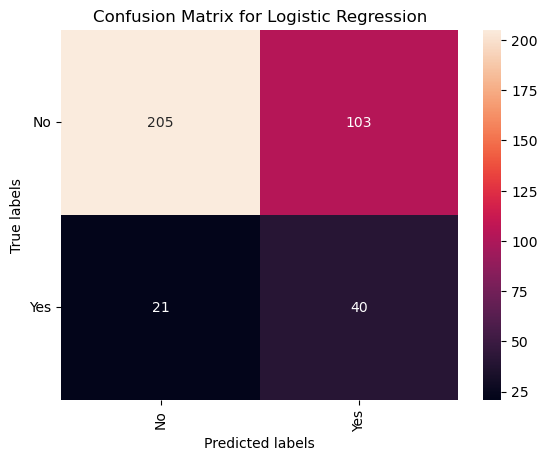

In [9]:
lr = LogisticRegression(max_iter=1000,random_state=0,class_weight='balanced')
print(lr.get_params())
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)
#lr_recall = recall_score(y_test,lr_y_pred)
print(lr_accuracy)

lr_cm = confusion_matrix(y_test,lr_y_pred)
lr_labels = lr.classes_

ax = plt.subplot()
sns.heatmap(lr_cm, annot=True, ax = ax,fmt="d");
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(lr_labels) 
ax.yaxis.set_ticklabels(lr_labels)

#print(lr.feature_names_in_)
#print(lr.coef_)
print(lr.classes_)

feature_importance = list(zip(lr.feature_names_in_,lr.coef_[0]))
print(tabulate(feature_importance,headers=['Feature','Coefficient']))

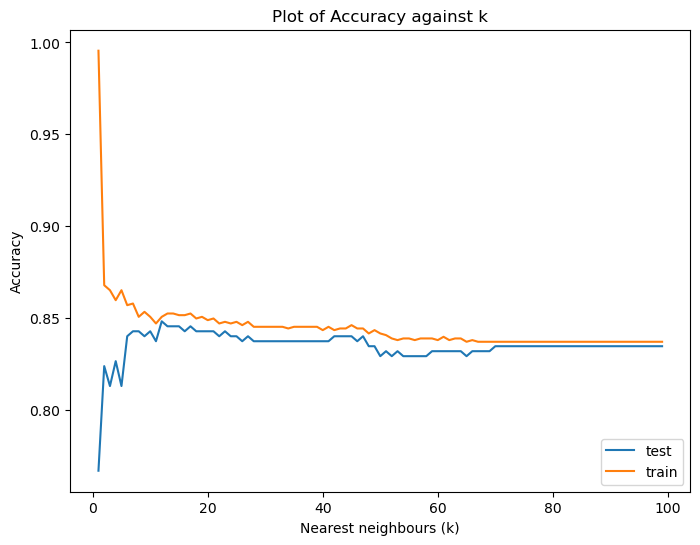

     k  accuracy
11  12  0.848238
16  17  0.845528
14  15  0.845528
13  14  0.845528
12  13  0.845528
Our best K Nearest Neighbours model is obtained with k = 12 with an accuracy of 84.8%.


In [10]:
ks, KNN_scores,KNN_train_scores = [],[],[]
for k in range(1,100):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    KNN_preds = KNN.predict(X_test)
    KNN_train_preds = KNN.predict(X_train)
    KNN_accuracy = accuracy_score(y_test,KNN_preds)
    KNN_train_accuracy = accuracy_score(y_train,KNN_train_preds)
    ks.append(k)
    KNN_scores.append(KNN_accuracy)
    KNN_train_scores.append(KNN_train_accuracy)
    
fig = plt.figure(figsize=(8,6))
ks = np.array(ks)
KNN_scores = np.array(KNN_scores)
KNN_train_scores = np.array(KNN_train_scores)
plt.plot(ks,KNN_scores,label='test')
plt.plot(ks,KNN_train_scores,label='train')
plt.legend(loc='lower right')
plt.xlabel('Nearest neighbours (k)')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy against k')
plt.show()


# make DataFrame of k's with corresponding accuracies for easy access
KNN_scores_df = pd.DataFrame({'k':ks,'accuracy':KNN_scores})

# get top 5 k's with best accuracies
print(KNN_scores_df.sort_values(by='accuracy',ascending=False)[:5])

KNN_best_k = KNN_scores_df.iloc[KNN_scores_df.accuracy.argmax(),0]
KNN_best_k_accuracy = KNN_scores_df.accuracy.max()

print(f'Our best K Nearest Neighbours model is obtained with k = {KNN_best_k} \
with an accuracy of {np.round(KNN_best_k_accuracy*100,1)}%.')

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

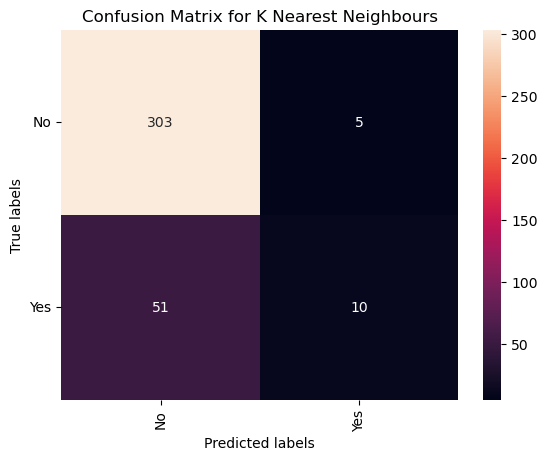

In [11]:
best_KNN = KNeighborsClassifier(n_neighbors=KNN_best_k)

best_KNN.fit(X_train,y_train)
best_KNN_pred = best_KNN.predict(X_test)
best_KNN_cm = confusion_matrix(y_test, best_KNN_pred)
best_KNN_labels = best_KNN.classes_

ax2 = plt.subplot()
sns.heatmap(best_KNN_cm, annot=True, ax = ax2,fmt="d");

# labels, title and ticks
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix for K Nearest Neighbours');
ax2.yaxis.set_tick_params(rotation=360)
ax2.xaxis.set_tick_params(rotation=90)

ax2.xaxis.set_ticklabels(best_KNN_labels) 
ax2.yaxis.set_ticklabels(best_KNN_labels)

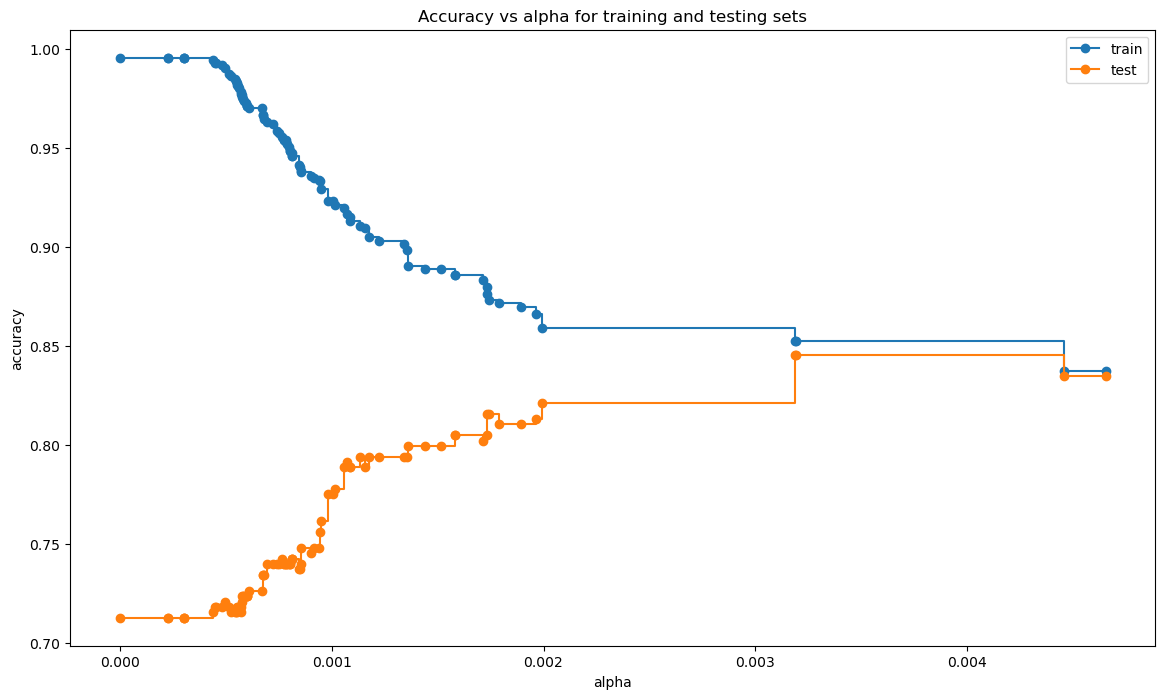

Our best Decision Tree changing only ccp_alpha and leaving other hyperparameters default gives an accuracy of 84.6% with ccp_alpha = 0.003186613846383475.


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

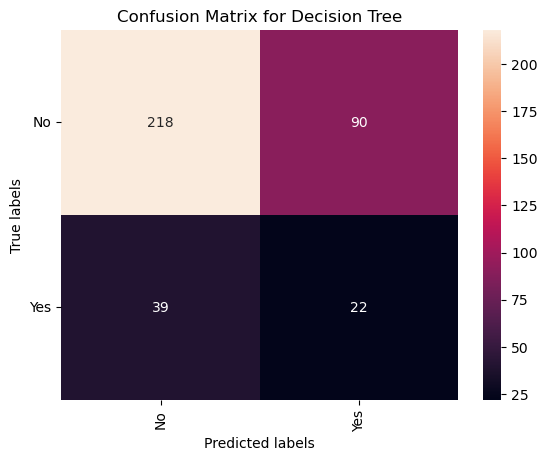

In [12]:
DTree = DecisionTreeClassifier(random_state=0)
DTree.fit(X_train,y_train)

path = DTree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas_to_test = path.ccp_alphas

# initialise list to store the classifiers with ccp_alpha changed
clfs_CCPOnly = []
for ccp_alpha in ccp_alphas_to_test:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=0)
    clf.fit(X_train, y_train)
    clfs_CCPOnly.append(clf)

# we remove the trivial tree which has only one node
clfs_CCPOnly = clfs_CCPOnly[:-1]
ccp_alphas_to_test = ccp_alphas_to_test[:-1]

# store train and test scores for classifiers
clfs_CCPOnly_train_scores = [clf.score(X_train,y_train) for clf in clfs_CCPOnly]
clfs_CCPOnly_test_scores = [clf.score(X_test,y_test) for clf in clfs_CCPOnly]

fig= plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_to_test, clfs_CCPOnly_train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_to_test, clfs_CCPOnly_test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
plt.clf()

# get ccp_alpha that gives best accuracy
dt_CCPOnly_accuracy_df = pd.DataFrame({'ccp_alpha':ccp_alphas_to_test,'accuracy':clfs_CCPOnly_test_scores})

best_ccp_other_hyperparams_default = dt_CCPOnly_accuracy_df.iloc[dt_CCPOnly_accuracy_df.accuracy.argmax(),0]
best_ccp_other_hyperparams_default_accuracy = dt_CCPOnly_accuracy_df.accuracy.max() 

print(f'Our best Decision Tree changing only ccp_alpha and leaving other hyperparameters default \
gives an accuracy of {np.round(best_ccp_other_hyperparams_default_accuracy*100,1)}% \
with ccp_alpha = {best_ccp_other_hyperparams_default}.')

finaldt = DecisionTreeClassifier(random_state=0,
                                 ccp_alpha=best_ccp_other_hyperparams_default,
                                class_weight='balanced')
finaldt.fit(X_train,y_train)
finaldt_cm = confusion_matrix(y_test,finaldt.predict(X_test))
finaldt_labels = finaldt.classes_

ax3 = plt.subplot()
sns.heatmap(finaldt_cm, annot=True, ax = ax3,fmt="d");

# labels, title and ticks
ax3.set_xlabel('Predicted labels');
ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix for Decision Tree');
ax3.yaxis.set_tick_params(rotation=360)
ax3.xaxis.set_tick_params(rotation=90)

ax3.xaxis.set_ticklabels(finaldt_labels) 
ax3.yaxis.set_ticklabels(finaldt_labels)